In [1]:
from imutils.video import VideoStream
from imutils import face_utils
import argparse
import imutils
import time
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
%cd drive/MyDrive/landmark

/content/drive/MyDrive/landmark


In [3]:
%ls

'face detection.ipynb'   img.jpg
 image.jpg               shape_predictor_5_face_landmarks.dat


In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
img = cv2.imread("image.jpg",0)
img = imutils.resize(img, width=400)
rects = detector(img, 0)
if len(rects) > 0:
		text = "{} face(s) found".format(len(rects))
		cv2.putText(img, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 0, 255), 2)
  	# loop over the face detections
for rect in rects:
		# compute the bounding box of the face and draw it on the
		# img
		(bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
		cv2.rectangle(img, (bX, bY), (bX + bW, bY + bH),
			(0, 255, 0), 1)
		# determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(img, rect)
		shape = face_utils.shape_to_np(shape)

		# loop over the (x, y)-coordinates for the facial landmarks
		# and draw each of them
		for (i, (x, y)) in enumerate(shape):
			cv2.circle(img, (x, y), 1, (255, 255, 255), -1)
			cv2.putText(img, str(i + 1), (x - 10, y - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

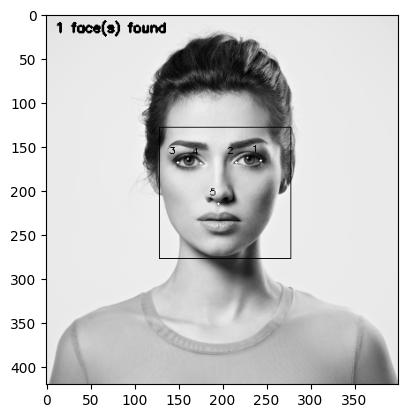

In [ ]:
plt.imshow(img,'gray')

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
vs = VideoStream(src=1).start()
time.sleep(2.0)
# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream, resize it to
	# have a maximum width of 400 pixels, and convert it to
	# grayscale
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# detect faces in the grayscale frame
	rects = detector(gray, 0)
	# check to see if a face was detected, and if so, draw the total
	# number of faces on the frame
	if len(rects) > 0:
		text = "{} face(s) found".format(len(rects))
		cv2.putText(frame, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 0, 255), 2)
  	# loop over the face detections
	for rect in rects:
		# compute the bounding box of the face and draw it on the
		# frame
		(bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
		cv2.rectangle(frame, (bX, bY), (bX + bW, bY + bH),
			(0, 255, 0), 1)
		# determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)

		# loop over the (x, y)-coordinates for the facial landmarks
		# and draw each of them
		for (i, (x, y)) in enumerate(shape):
			cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
			cv2.putText(frame, str(i + 1), (x - 10, y - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)
   	# show the frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

AttributeError: ignored